# Assignment 8 Arhat Shah

In [38]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

## Load data from URL

In [39]:
url = "https://stats.oecd.org/sdmx-json/data/DP_LIVE/.MEATCONSUMP.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en"
data = pd.read_csv(url)
# drop the flag codes column because it only has null values
df = data.drop('Flag Codes', axis = 1)

df.head()


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,0.000
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.942
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.405
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.370
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.662


## step 2

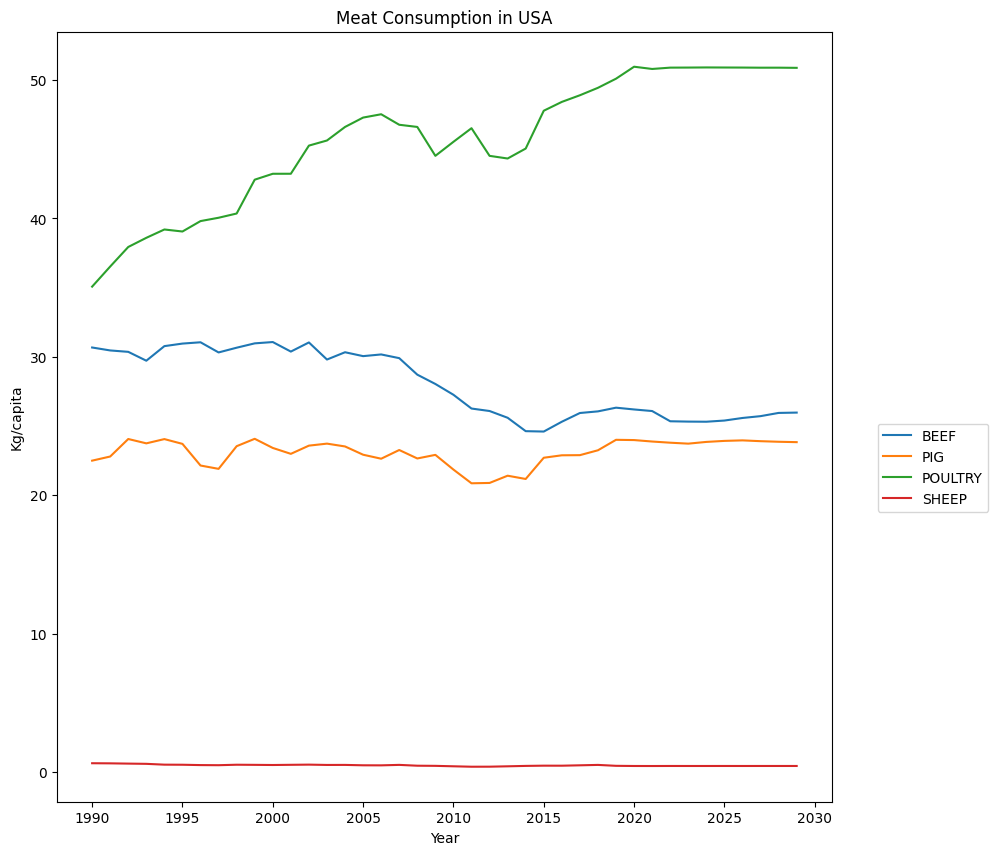

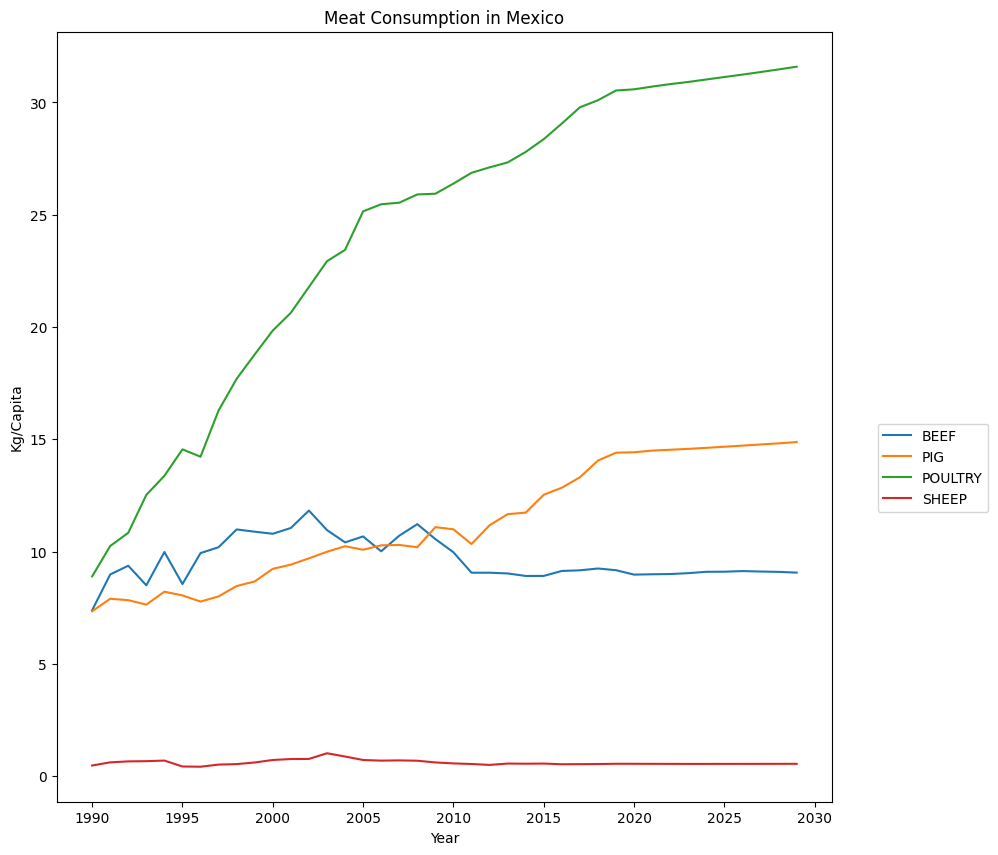

In [40]:
# select the necessary columns
df = df[['LOCATION', 'MEASURE', 'SUBJECT', 'TIME', 'Value']]

# USA
usa = df[df['LOCATION'] == 'USA']
usa = usa[usa['MEASURE'] == 'KG_CAP']

# Mexico
mex = df[df['LOCATION'] == 'MEX']
mex = mex[mex['MEASURE'] == 'KG_CAP']

# plot for USA
plt.figure(figsize=(10, 10))
for meat in usa['SUBJECT'].unique():
    mask = (usa['SUBJECT'] == meat)
    plt.plot(usa[mask]['TIME'], usa[mask]['Value'], label=meat.strip())
plt.title('Meat Consumption in USA')
plt.xlabel('Year')
plt.ylabel('Kg/capita')
plt.legend(bbox_to_anchor=(1.05, 0.5))
plt.show()

# plot for Mexico
plt.figure(figsize=(10, 10))
for meat in mex['SUBJECT'].unique():
    mask = (mex['SUBJECT'] == meat)
    plt.plot(mex[mask]['TIME'], mex[mask]['Value'], label=meat.strip())
plt.title('Meat Consumption in Mexico')
plt.xlabel('Year')
plt.ylabel('Kg/Capita')
plt.legend(bbox_to_anchor=(1.05, 0.5))
plt.show()

### In the pictured charts, we can see meat consumption trends by country. In the USA, beef consumption has been declining since the beginning of the 2000s and is now at its lowest point in the history of the data. Pork consumption has been slowly increasing, but remains relatively steady. Sheep consumption has remained very low, close to zero. Poultry however, has been increasing and is the most consumed meat in the US. In Mexico, the results are very similar, except that pork has slowly increased over time, sheep consumption is slightly higher, but still close to 0. 

## step 3

In [41]:
# South Africa
south_africa = df.loc[(df['LOCATION'] == 'ZAF')]

# Filter for 1994-2014
south_africa_filtered = south_africa.loc[south_africa['SUBJECT'] == 'POULTRY']
south_africa_filtered = south_africa_filtered.loc[(south_africa_filtered['TIME'] >= 1994) & (south_africa_filtered['TIME'] <= 2014) & (south_africa_filtered['MEASURE'] == 'THND_TONNE')][['TIME', 'Value']]
south_africa_filtered.round(2)

,TIME,Value
6444,1994,628.90
6445,1995,709.42
6446,1996,710.26
6447,1997,780.82
6448,1998,725.00
6449,1999,800.04
6450,2000,894.46
6451,2001,953.23
6452,2002,1003.44
6453,2003,1046.54


## step 4

In [42]:
statistics = south_africa_filtered.describe()
print(statistics.round(2))

         TIME    Value
count    21.0    21.00
mean   2004.0  1224.01
std       6.2   466.22
min    1994.0   628.90
25%    1999.0   800.04
50%    2004.0  1084.41
75%    2009.0  1598.91
max    2014.0  2113.79


### The dataframe contains 21 years of data, from 1994 to 2014. The mean of the data is 1224.01 thousand tonnes of carcass weight, and the median is is 1084.41 thousand tonnes of carcass weight. The standard deviation is 466.22 thousand tonnes of carcass weight. Since the mean is greater than the median, the data is skewed to the right. The minimum and maximum were 628.90 thousand tonnes of carcass weight, and 2113.79 thousand tonnes of carcass weight, respectively. This demonstrates a large spread in the data. 

## step 5

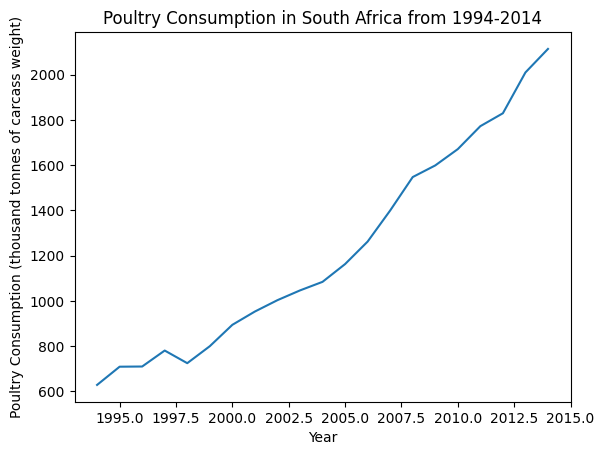

In [43]:
plt.plot(south_africa_filtered['TIME'], south_africa_filtered['Value'])
plt.xlabel('Year')
plt.ylabel('Poultry Consumption (thousand tonnes of carcass weight)')
plt.title('Poultry Consumption in South Africa from 1994-2014')
plt.show()

### This line chart shows an increase in the consumption of poultry in South Africa over the years 1994 to 2014. The chart shows a steady and fast increase in the consumption of poultry.

## step 6

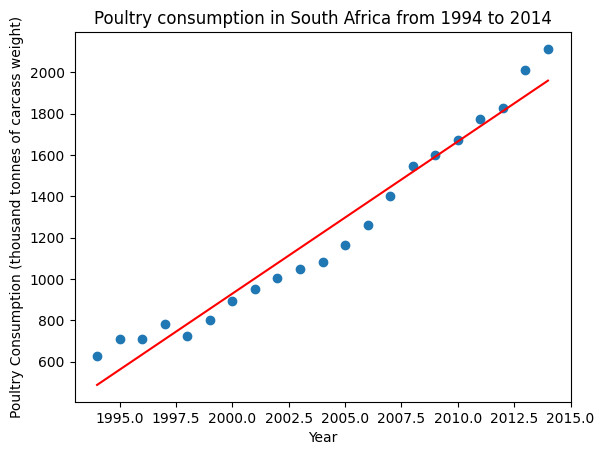

Predicted poultry consumption for 2015: 2034.06
Predicted poultry consumption for 2016: 2107.7


In [44]:
# x and y data
x = south_africa_filtered['TIME'].values
y = south_africa_filtered['Value'].values

# linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Predict
pred_2015 = np.round(slope * 2015 + intercept, 2)
pred_2016 = np.round(slope * 2016 + intercept, 2)

plt.scatter(x, y)
plt.plot(x, slope * x + intercept, color='red')
plt.title('Poultry consumption in South Africa from 1994 to 2014')
plt.xlabel('Year')
plt.ylabel('Poultry Consumption (thousand tonnes of carcass weight)')
plt.show()

print('Predicted poultry consumption for 2015:', pred_2015)
print('Predicted poultry consumption for 2016:', pred_2016)

## step 7

In [45]:
# extract the year and consumption data
x = south_africa_filtered['TIME'].values.reshape(-1, 1)
y = south_africa_filtered['Value'].values.reshape(-1, 1)
model = LinearRegression()
# fit the model to the data
model.fit(x, y)
# calculate the r squared value
r_squared = model.score(x, y)
r_squared = round(r_squared, 2)

print("r-squared value: ", r_squared)

r-squared value:  0.96


### The r-squared calue is 0.96, which means the linear regression model describes about 96% of the data. This means that the model is a good fit for the data.